4.10 Coding Etiquette and Excel Reporting - Part 1

In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#import data files
path = r'/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 4 - Python/28-09-2025 Instacart Basket Analysis'

In [4]:
path

'/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 4 - Python/28-09-2025 Instacart Basket Analysis'

Number 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column. 

In [5]:
#importing dataframe
merged_df2 = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'merged_df_cust.pkl'))

In [6]:
#checking the dataframe
merged_df2.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,spending_flag,median_days_between_orders,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,martial_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
#checking the shape of the dataframe
merged_df2.shape

(32404859, 33)

Number 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [8]:
#checking columns for data that could contain PII and sensitive information
merged_df2.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'prices_range_loc',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'martial_status', 'income'],
      dtype='object')

This dataset does not contain PII information as the customers first and last name were already removed.

Number 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [9]:
#Importing wrangled data to use for the customer profiles
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data' , 'departments_wrangled.csv'),index_col = False)

In [10]:
#checking dataframe
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
#renaming the first column
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [12]:
#checking output
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


state mapping from https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [13]:
#creating a dictionary mapping the states to regions

state_to_region = {
    # Northeast
    'Connecticut':'Northeast', 'Maine':'Northeast', 'Massachusetts':'Northeast', 'New Hampshire':'Northeast',
    'Rhode Island':'Northeast', 'Vermont':'Northeast', 'New Jersey':'Northeast', 'New Jersey':'Northeast', 'Pennsylvania':'Northeast',
    
    # Midwest
    'Illinois': 'Midwest','Indiana': 'Midwest','Michigan':'Midwest', 'Ohio': 'Midwest', 'Wisconsin':'Midwest',  'Iowa': 'Midwest',
    'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest','Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',    
     
    
    # South
    'Delaware': 'South', 'District of Columbia': 'South', 'Florida': 'South', 'Georgia': 'South', 'Maryland': 'South', 'North Carolina': 'South',
    'South Carolina': 'South',  'Virginia': 'South', 'West Virginia': 'South',  'Alabama': 'South','Kentucky': 'South','Mississippi': 'South', 
    'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    
    # West
    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West',  
    'Alaska': 'West', 'California': 'West', 'Hawaii': 'West','Oregon': 'West', 'Washington': 'West',
}

In [14]:
#Creating a region column and assigning them to each state
merged_df2 ['region'] = merged_df2['state'].map(state_to_region)

In [15]:
#checking output
merged_df2[['region','state']]

,region,state
0,South,Alabama
1,South,Alabama
2,South,Alabama
3,South,Alabama
4,South,Alabama
...,...,...
32404854,Midwest,Iowa
32404855,Midwest,Iowa
32404856,Midwest,Iowa
32404857,Midwest,Iowa


In [16]:
#checking dataframe for columns
merged_df2.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,median_days_between_orders,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,martial_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [17]:
merged_df2[merged_df2.isna().any(axis=1)]


,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,median_days_between_orders,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,martial_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,2977660,206209,13,1,12,7.0,14197,5,1,both,...,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404855,2977660,206209,13,1,12,7.0,38730,6,0,both,...,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404856,2977660,206209,13,1,12,7.0,31477,7,0,both,...,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404857,2977660,206209,13,1,12,7.0,6567,8,0,both,...,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest


In [18]:
#Removing the Nan in the Days_since_prior_order
merged_df2['days_since_prior_order'] = merged_df2['days_since_prior_order'].fillna(0)

In [19]:
#checking output
merged_df2

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,median_days_between_orders,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,martial_status,income,region
0,2539329,1,1,2,8,0.0,196,1,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,0.0,14084,2,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,0.0,12427,3,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,0.0,26088,4,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,0.0,26405,5,0,both,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,2977660,206209,13,1,12,7.0,14197,5,1,both,...,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404855,2977660,206209,13,1,12,7.0,38730,6,0,both,...,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404856,2977660,206209,13,1,12,7.0,31477,7,0,both,...,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest
32404857,2977660,206209,13,1,12,7.0,6567,8,0,both,...,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Midwest


In [20]:
#determining if there is a difference in the spending habits between the different us regions
crosstab_spending = pd.crosstab(merged_df2['region'], merged_df2['spending_flag'], dropna = False)

In [21]:
#checking output
crosstab_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,98062,4988691
South,209691,10582194
West,160354,8132559
NaN,10163,625820


In [22]:
#dropping Nan's in cross spending
crosstab_spending = pd.crosstab(
    merged_df2['region'],
    merged_df2['spending_flag'],
    dropna=True
)

In [23]:
#checking output for removal of Nan's
crosstab_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,98062,4988691
South,209691,10582194
West,160354,8132559


In [24]:
#Counting the spending_flag
merged_df2['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     31770614
High spender      634245
Name: count, dtype: int64

This shows that most customers are low spenders.

Text(0, 0.5, 'Count of Customers (in Millions)')

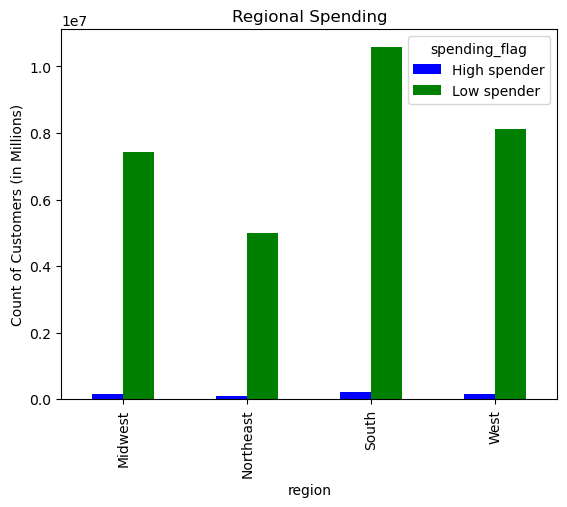

In [25]:
#making a bar chart visualization and exporting 
bar_spending_visual = crosstab_spending.plot(kind = "bar", color = ['blue', 'green'])

plt.title ('Regional Spending')

plt.ylabel ('Count of Customers (in Millions)')

In [26]:
#exporting bar chart
bar_spending_visual.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_regional_spending_chart.png'), bbox_inches = 'tight')

Number 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [27]:
#creating an exclusion flag column basd on the max_order
merged_df2.loc[merged_df2['max_order'] <5, 'customer_activity'] = 'low'
merged_df2.loc[merged_df2['max_order'] >=5,'customer_activity'] = 'high'

In [28]:
#checking output to see if flag populated correctly
merged_df2['customer_activity'].value_counts(dropna = False)

customer_activity
high    30964564
low      1440295
Name: count, dtype: int64

In [29]:
#filtering only the low active customers
low_active_cust = merged_df2[merged_df2['customer_activity']=='low']

In [30]:
#checking the subset
low_active_cust.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,martial_status,income,region,customer_activity
360,2717275,5,1,3,12,0.0,15349,1,0,both,...,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low
361,2717275,5,1,3,12,0.0,21413,2,0,both,...,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low
362,2717275,5,1,3,12,0.0,48775,3,0,both,...,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low
363,2717275,5,1,3,12,0.0,28289,4,0,both,...,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low
364,2717275,5,1,3,12,0.0,8518,5,0,both,...,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low


In [31]:
#checking the shape
low_active_cust.shape

(1440295, 35)

In [32]:
#exporting the subset
low_active_cust.to_pickle(os.path.join(path,'02 Data', 'Prepared Data','low_activity_cust.pkl'))

In [33]:
#creating a dataframe for the high active users
high_active_cust = merged_df2[merged_df2['customer_activity']=='high']

In [34]:
high_active_cust.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,martial_status,income,region,customer_activity
0,2539329,1,1,2,8,0.0,196,1,0,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high
1,2539329,1,1,2,8,0.0,14084,2,0,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high
2,2539329,1,1,2,8,0.0,12427,3,0,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high
3,2539329,1,1,2,8,0.0,26088,4,0,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high
4,2539329,1,1,2,8,0.0,26405,5,0,both,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high


In [35]:
high_active_cust.shape

(30964564, 35)

In [36]:
#exporting the high active users
low_active_cust.to_pickle(os.path.join(path,'02 Data', 'Prepared Data','high_activity_cust.pkl'))

Number 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [37]:
#creating the age groups
age_labels = ['Young Adult (18-30)', 'Adult (31-45)', 'Middle Age (46-60)', 'Senior (60+)']
merged_df2['age_group'] = pd.cut(merged_df2['age'], bins=[18, 30, 45, 60, 120], labels=age_labels)

In [38]:
#checking output
age_labels

['Young Adult (18-30)', 'Adult (31-45)', 'Middle Age (46-60)', 'Senior (60+)']

In [39]:
# Creating income brackets
income_labels = ['Low Income', 'Middle Income', 'Upper Middle Income', 'High Income']
merged_df2['income_bracket'] = pd.cut(merged_df2['income'], bins=[0, 40000, 80000, 120000, 200000], labels=income_labels)

In [40]:
#checking output
income_labels

['Low Income', 'Middle Income', 'Upper Middle Income', 'High Income']

In [41]:
#checking the top products shopped for
merged_df2['department_id'].value_counts()

department_id
4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: count, dtype: int64

In [42]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [43]:
# Merging dataset with the department names
merged_df2 = merged_df2.merge(df_dept, on='department_id', how='left')

# Group and count the number of orders per department
department_popularity = merged_df2.groupby(['department_id', 'department']).size().reset_index(name='order_count')

# Sort by popularity 
department_popularity = department_popularity.sort_values(by='order_count', ascending=False)

In [44]:
#checking output
department_popularity

,department_id,department,order_count
3,4,produce,9479291
15,16,dairy eggs,5398747
18,19,snacks,2887550
6,7,beverages,2688123
0,1,frozen,2234743
12,13,pantry,1875369
2,3,bakery,1172428
14,15,canned goods,1068058
19,20,deli,1051249
8,9,dry goods pasta,866627


In [45]:
# Time of purchase profile
def time_profile(hour):
    if 5 <= hour < 12:
        return 'Morning Shopper'
    elif 12 <= hour < 17:
        return 'Afternoon Shopper'
    elif 17 <= hour < 22:
        return 'Evening Shopper'
    else:
        return 'Late Night Shopper'

merged_df2['shopping_time'] = merged_df2['orders_hour_of_day'].apply(time_profile)


In [46]:
#checking output
merged_df2['shopping_time'].unique()

array(['Morning Shopper', 'Afternoon Shopper', 'Evening Shopper',
       'Late Night Shopper'], dtype=object)

In [47]:
# Creating a product preference category from departments

merged_df2['product_preference'] = merged_df2['department_id'].map({
    4: 'Health Conscious',            # produce
    16: 'Convenience Shopper',       # dairy eggs
    7: 'Beverage Buyer',             # beverages
    19: 'Snack Lover',               # snacks
    18: 'Household Essentials',      # household
    14: 'Parent Shopper',            # breakfast / kids
    2: 'General Goods',              # other
    1: 'Frozen Foods',               # frozen
    20: 'Deli Regular',              # deli
    13: 'Pantry Stocker'             # pantry
}).fillna('General Shopper')


In [48]:
def create_profile(row):
    if row['number_of_dependents'] == 0 and row['age_group'] == 'Young Adult (18-30)':
        return 'Single Young Adult'
    elif row['number_of_dependents'] > 0 and row['income_bracket'] in ['Low Income', 'Middle Income']:
        return 'Budget-Conscious Parent'
    elif row['number_of_dependents'] > 0 and row['martial_status'] == 'Married':
        return 'Family Household'
    elif row['income_bracket'] == 'High Income' and row['age_group'] in ['Adult (31-45)', 'Middle Age (46-60)']:
        return 'Affluent Professional'
    else:
        return 'General Shopper'

merged_df2['customer_profile'] = merged_df2.apply(create_profile, axis=1)


In [49]:
#checking output
merged_df2[['user_id', 'age_group', 'income_bracket', 'number_of_dependents', 'shopping_time', 'customer_profile']].head(20)


,user_id,age_group,income_bracket,number_of_dependents,shopping_time,customer_profile
0,1,Adult (31-45),Middle Income,3,Morning Shopper,Budget-Conscious Parent
1,1,Adult (31-45),Middle Income,3,Morning Shopper,Budget-Conscious Parent
2,1,Adult (31-45),Middle Income,3,Morning Shopper,Budget-Conscious Parent
3,1,Adult (31-45),Middle Income,3,Morning Shopper,Budget-Conscious Parent
4,1,Adult (31-45),Middle Income,3,Morning Shopper,Budget-Conscious Parent
5,1,Adult (31-45),Middle Income,3,Morning Shopper,Budget-Conscious Parent
6,1,Adult (31-45),Middle Income,3,Morning Shopper,Budget-Conscious Parent
7,1,Adult (31-45),Middle Income,3,Morning Shopper,Budget-Conscious Parent
8,1,Adult (31-45),Middle Income,3,Morning Shopper,Budget-Conscious Parent
9,1,Adult (31-45),Middle Income,3,Morning Shopper,Budget-Conscious Parent


Number 6. Create an appropriate visualization to show the distribution of profiles.

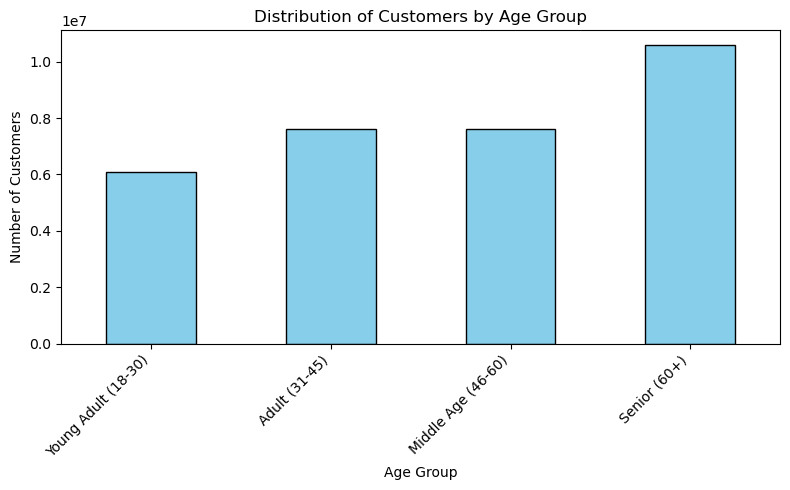

In [50]:
# Count values in each age group
age_counts = merged_df2['age_group'].value_counts().reindex(age_labels)

# Create bar chart
plt.figure(figsize=(8,5))
age_counts = merged_df2['age_group'].value_counts().reindex(age_labels)
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_distribution.png'))

# Show chart
plt.show()

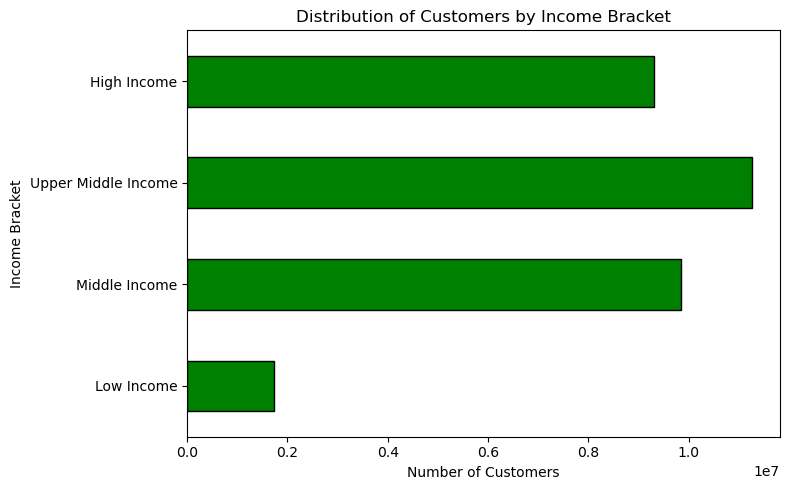

In [51]:
# Count values in each income group
income_counts = merged_df2['income_bracket'].value_counts().reindex(income_labels)

# Create bar chart with a green theme
plt.figure(figsize=(8,5))
income_counts.plot(kind='barh', color='green', edgecolor='black')
plt.title('Distribution of Customers by Income Bracket')
plt.ylabel('Income Bracket')
plt.xlabel('Number of Customers')
plt.tight_layout()

# Export chart as PNG
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'income_distribution.png'))

# Show chart
plt.show()

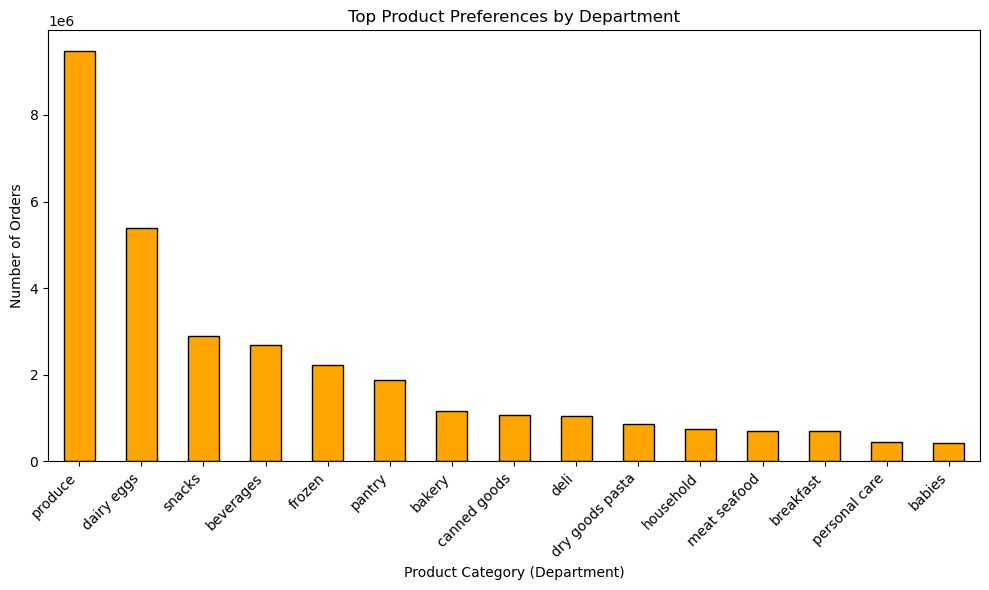

In [52]:
# Count how many orders come from each product category (department)
product_pref_counts = merged_df2['department'].value_counts().head(15)  

# Create bar chart
plt.figure(figsize=(10,6))
product_pref_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top Product Preferences by Department')
plt.xlabel('Product Category (Department)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Export chart as PNG
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'product_preferences.png'))

# Show chart
plt.show()

Number 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [53]:
merged_df2.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'prices_range_loc',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'martial_status', 'income', 'region',
       'customer_activity', 'age_group', 'income_bracket', 'department',
       'shopping_time', 'product_preference', 'customer_profile'],
      dtype='object')

In [54]:
#aggregating income bracket for expenditure.
merged_df2.groupby('income_bracket').agg({'prices':['mean','min','max']})

/var/folders/5p/rxp_8kqn1tgbtc0fc968b0mh0000gn/T/ipykernel_43408/1481422385.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df2.groupby('income_bracket').agg({'prices':['mean','min','max']})


prices              
                          mean  min      max
income_bracket                              
Low Income            6.495264  1.0     25.0
Middle Income         7.668273  1.0  14900.0
Upper Middle Income   9.616585  1.0  99999.0
High Income          13.400935  1.0  99999.0

Low income earners spend the least on average, while middle income earners spend slightly more.  

In [55]:
#aggregating income profile for usuage frequency
merged_df2.groupby('income_bracket').agg({'median_days_between_orders':['mean','min','max']})

/var/folders/5p/rxp_8kqn1tgbtc0fc968b0mh0000gn/T/ipykernel_43408/2622105878.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df2.groupby('income_bracket').agg({'median_days_between_orders':['mean','min','max']})


median_days_between_orders           
                                          mean  min   max
income_bracket                                           
Low Income                           11.254839  0.0  30.0
Middle Income                        10.456377  0.0  30.0
Upper Middle Income                  10.312064  0.0  30.0
High Income                          10.313752  0.0  30.0

order frequency is the same regardless of income. Customers have about 10 days between orders. There is no direct relation between income and usuage frequency.

Number 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

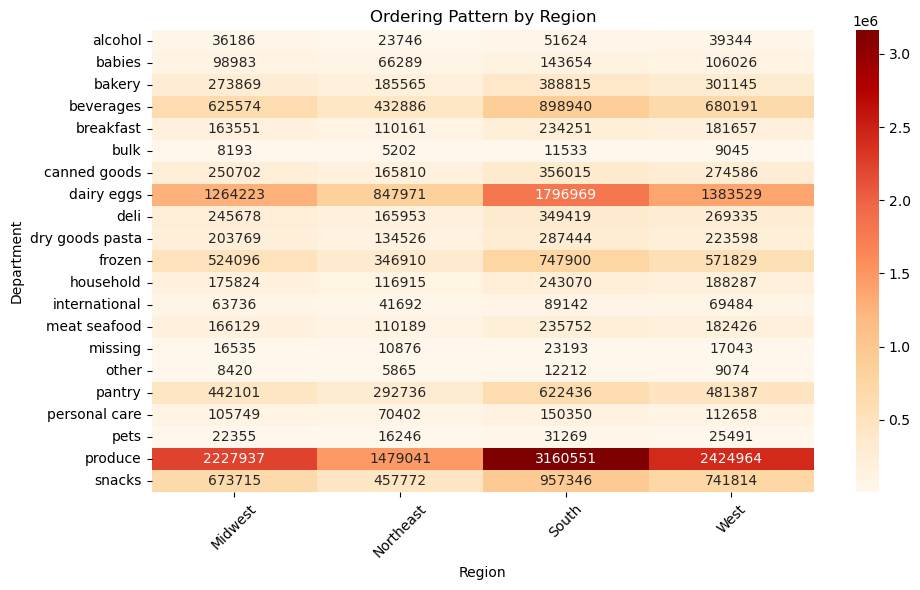

In [56]:
# Creating heatmap to see if there is a correlation between region and departments
region_dept = pd.crosstab(merged_df2['department'], merged_df2['region'])

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(region_dept, annot=True, fmt='d', cmap='OrRd')  # Corrected colormap name
plt.title('Ordering Pattern by Region')
plt.xlabel('Region')
plt.ylabel('Department')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Saving figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_dept_region.png'))

# Display
plt.show()


Produce is the most popular department in the south with dairy eggs being the second most popular. It also appears that beverage items are popular in the south along with pantry items.


Number 9. Produce suitable charts to illustrate your results and export them in your project folder.

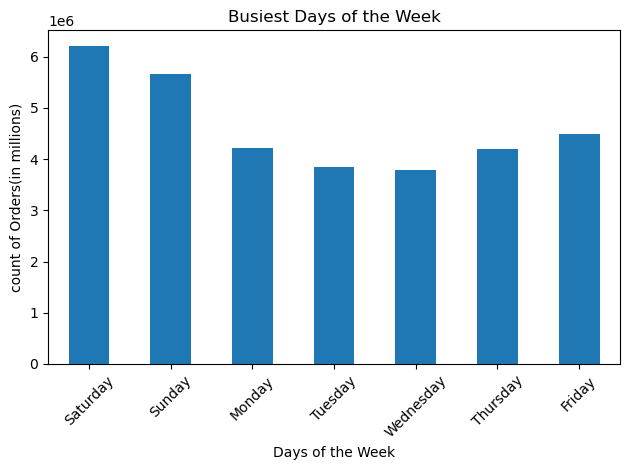

In [57]:
#Sales team - Busiest days of the week and hours of the day
bar_orders = merged_df2['orders_day_of_week'].value_counts().sort_index().plot.bar()

plt.title('Busiest Days of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('count of Orders(in millions)')
plt.xticks(ticks=range(7), labels=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'], rotation=45)
plt.tight_layout()

In [58]:
#exporting chart
bar_orders.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'busiest_day_of_week.png'),bbox_inches='tight')

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

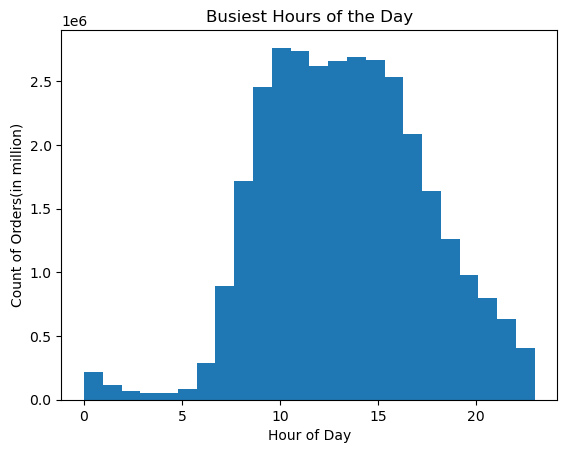

In [59]:
#creating busiest hours of the day
busiest_hours = merged_df2['orders_hour_of_day'].plot.hist(bins = 24)

plt.title('Busiest Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Orders(in million)')

plt.tight_layout

the most busiest times are between 10am and 3pm. Few orders are placed before 5am. Orders after 3pm begin to slowly decrease.

In [60]:
busiest_hours.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','busiest_hours_hist.png'),bbox_inches='tight')

In [61]:
#creating random sample
np.random.seed(4)

In [62]:
#creating a list of true/false values to test
dev = np.random.rand(len(merged_df2)) <=0.7

In [63]:
#store 70% of the same in the df big
big = merged_df2[dev]

In [64]:
#store 30% of the same in the dataframe small
small = merged_df2[~dev]

In [65]:
len(merged_df2)

32404859

In [66]:
#checking if dataframes connected
len(big) + len(small)

32404859

In [67]:
#when people spend the most money
price_spending = small[['orders_hour_of_day','prices']]

In [68]:
price_spending.head()

,orders_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


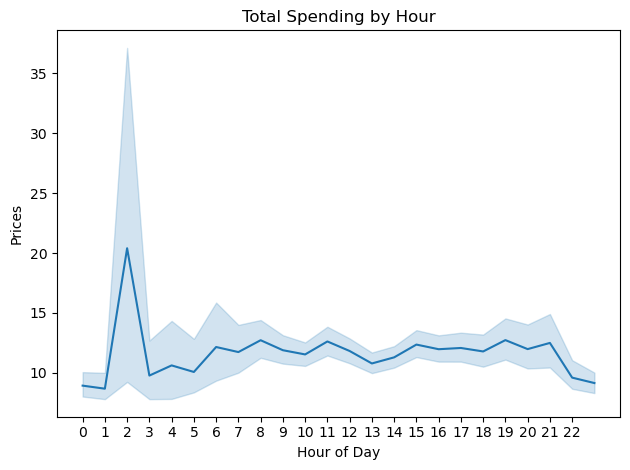

In [69]:
#creating a line chart using the small sample size

line_price_hours = sns.lineplot(data = price_spending, x = 'orders_hour_of_day', y = 'prices')
plt.title('Total Spending by Hour')
plt.xlabel('Hour of Day')
plt.xticks(range(0,23))
plt.ylabel('Prices')

plt.tight_layout()

The total spending is the highest when it is around 2am, 6am, and 8am.

In [70]:
#exporting chart
line_price_hours.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'line_price_hours.png'),bbox_inches='tight')

Customer Distribution by Loyalty Status

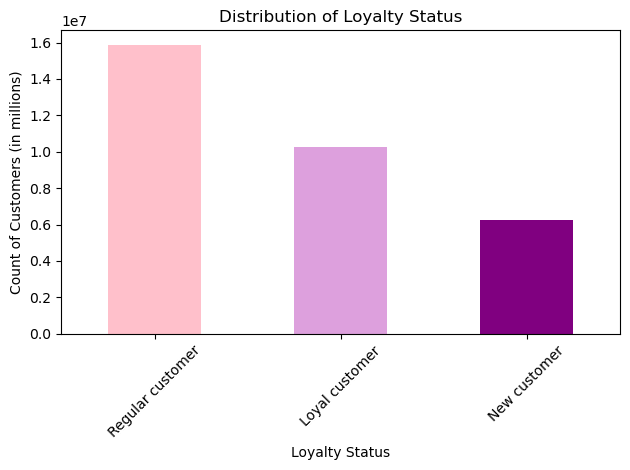

In [71]:
#checking the customer distribution on loyalty

bar_loyalty_flag = merged_df2['loyalty_flag'].value_counts(dropna = False).plot.bar(color = ['pink','plum','purple'])

plt.title('Distribution of Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Customers (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()


most are regulars with a small percentage of the customers being new.

In [72]:
#exporting chart
bar_loyalty_flag.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty_dist.png'),bbox_inches = 'tight')

In [73]:
#checking on the ordering habits of customers
merged_df2.groupby('loyalty_flag').agg({'order_number' : ['mean','min','max']})

order_number        
                         mean min max
loyalty_flag                         
Loyal customer      32.641196   1  99
New customer         3.807044   1  10
Regular customer    12.347452   1  40

In [74]:
#creating a variable to plot
mean_order_loyalty = merged_df2.groupby('loyalty_flag')['order_number'].mean()
mean_order_loyalty

loyalty_flag
Loyal customer      32.641196
New customer         3.807044
Regular customer    12.347452
Name: order_number, dtype: float64

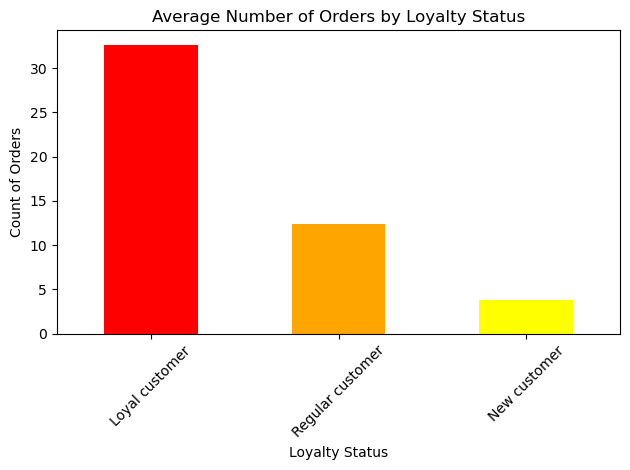

In [75]:
#sorting values from highest to lowest
mean_order_loyalty_sort = mean_order_loyalty.sort_values(ascending=False)

#making a bar chart with the ordering habits by loyalty status
bar_avg_order_loyal = mean_order_loyalty_sort.plot.bar(color=[ 'red','orange','yellow'])

#creating labels for better readability

plt.title('Average Number of Orders by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Orders')
plt.xticks(rotation = 45)
plt.tight_layout()

The most loyal customers make the most orders. On average it is more than 30. The newest customers are as loyal with an average of less than 5 orders.

In [76]:
#Exporting bar chart

bar_avg_order_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_avg_order_loyal.png'),bbox_inches='tight')

In [77]:
#Finding the median days between orders by loyalty status

merged_df2.groupby('loyalty_flag').agg({'median_days_between_orders': ['min','max','mean']})

median_days_between_orders                 
                                        min   max       mean
loyalty_flag                                                
Loyal customer                          0.0  14.0   5.170559
New customer                            0.0  30.0  18.459990
Regular customer                        0.0  30.0  10.612951

Loyal customers return to using instacart with an average of 5 days between placing orders. The max days between placing orders is 14 days. Regular and new customers have a maximum of 30 days between orders. Rsgular customers return more frequently than new customers with an average of 10 days between orders.#creating labels for better readability

Household Status by Region

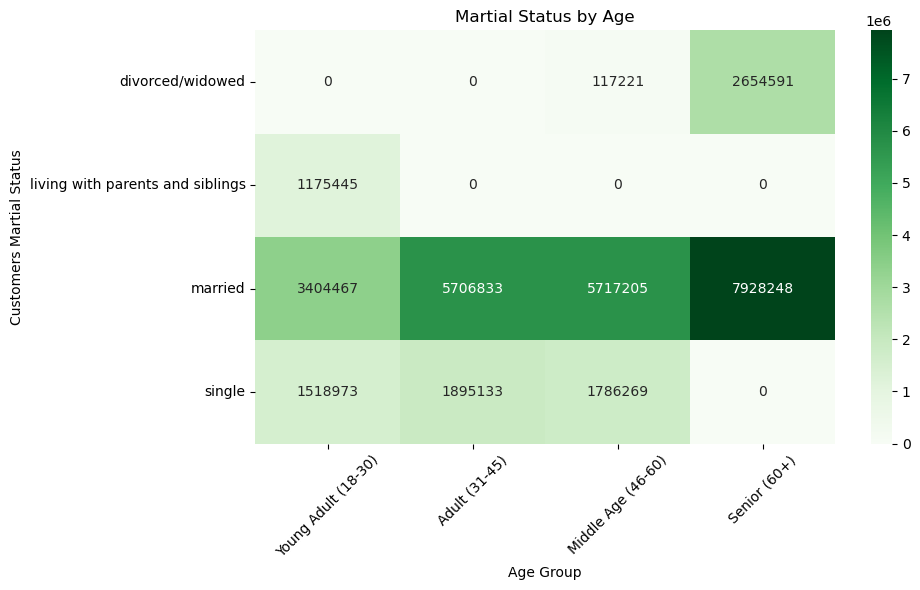

In [78]:
#creating a crosstab of region and household status

crosstab_region1 = pd.crosstab(merged_df2['martial_status'],merged_df2['age_group'])

plt.figure(figsize=(10,6))
sns.heatmap(crosstab_region1,annot=True, fmt='d', cmap='Greens')
plt.title('Martial Status by Age')
plt.xlabel('Age Group')
plt.ylabel('Customers Martial Status')

plt.xticks(rotation=45)
plt.yticks (rotation=0)
plt.tight_layout()

#Saving chart 
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','heatmap_martialstatus_agegroup.png'),bbox_inches='tight')

Based on the heatmap above, the most common instacart orders are those that are seniors 60+ that are married. It gradually decreases from 60+ to 18. The married category is the highest category of orders. The least amount is the living with parents and sibling. Anyone over the age of 31, they do not place any orders, if they are living with their parents or their siblings. Also divorced/widowed customers place the most orders over the age of 60. It is just the opposite with single customers if they are over the age of 60.

In [79]:
#checking out the max order in the martial household
martial_status_orders = merged_df2.groupby('martial_status')['order_number'].max()

In [80]:
martial_status_orders

martial_status
divorced/widowed                    99
living with parents and siblings    99
married                             99
single                              99
Name: order_number, dtype: int64

In [81]:
#calculating the average
martial_avg_status_orders = merged_df2.groupby('martial_status')['order_number'].mean()
martial_avg_status_orders

martial_status
divorced/widowed                    17.275873
living with parents and siblings    17.296372
married                             17.088283
single                              17.258766
Name: order_number, dtype: float64

In [82]:
#checking the dataframe shape
merged_df2.shape

(32404859, 41)

In [83]:
#checking the final dataframe output
merged_df2.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,martial_status,income,region,customer_activity,age_group,income_bracket,department,shopping_time,product_preference,customer_profile
0,2539329,1,1,2,8,0.0,196,1,0,both,...,married,40423,South,high,Adult (31-45),Middle Income,beverages,Morning Shopper,Beverage Buyer,Budget-Conscious Parent
1,2539329,1,1,2,8,0.0,14084,2,0,both,...,married,40423,South,high,Adult (31-45),Middle Income,dairy eggs,Morning Shopper,Convenience Shopper,Budget-Conscious Parent
2,2539329,1,1,2,8,0.0,12427,3,0,both,...,married,40423,South,high,Adult (31-45),Middle Income,snacks,Morning Shopper,Snack Lover,Budget-Conscious Parent
3,2539329,1,1,2,8,0.0,26088,4,0,both,...,married,40423,South,high,Adult (31-45),Middle Income,snacks,Morning Shopper,Snack Lover,Budget-Conscious Parent
4,2539329,1,1,2,8,0.0,26405,5,0,both,...,married,40423,South,high,Adult (31-45),Middle Income,household,Morning Shopper,General Shopper,Budget-Conscious Parent


In [84]:
merged_df2.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'prices_range_loc',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'martial_status', 'income', 'region',
       'customer_activity', 'age_group', 'income_bracket', 'department',
       'shopping_time', 'product_preference', 'customer_profile'],
      dtype='object')

In [89]:
merged_df2.shape

(32404859, 41)

In [90]:
profile_counts = merged_df2['customer_profile'].value_counts()

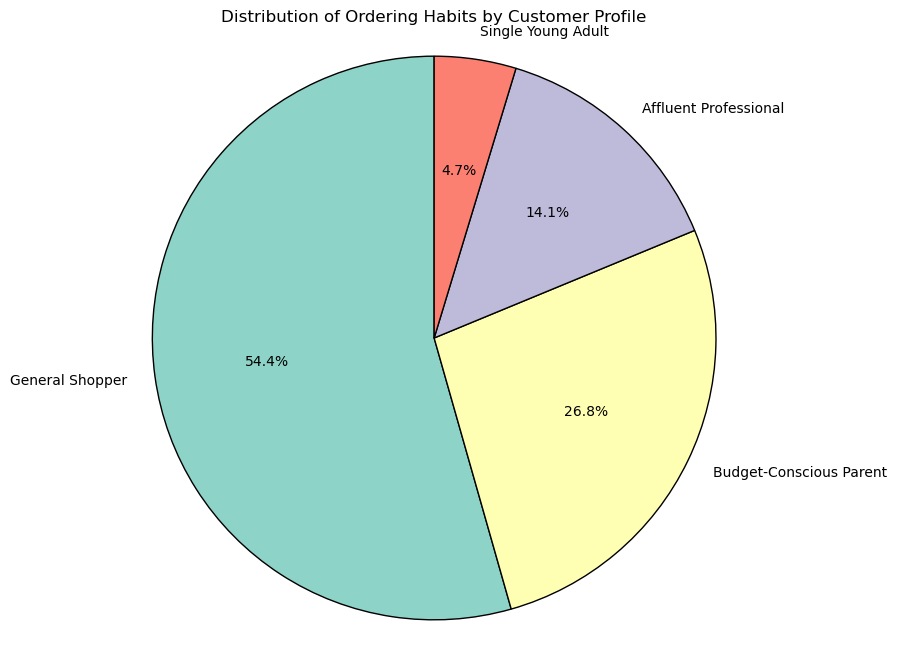

In [96]:
colors = plt.cm.Set3.colors[:len(profile_counts)]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    profile_counts,
    labels=profile_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

# Add a title
plt.title('Distribution of Ordering Habits by Customer Profile')

# Ensure chart is circular
plt.axis('equal')

plt.savefig(os.path.join(path,'04 Analysis','Visualizations','customer_profile_distribution.png'),bbox_inches='tight')

# Display the chart
plt.show()

In [98]:
#exporting final dataframe
merged_df2.to_pickle(os.path.join(path, '02 Data','Prepared Data','Final_Analysis1.pkl'))